In [38]:
import numpy as np
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn import datasets

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


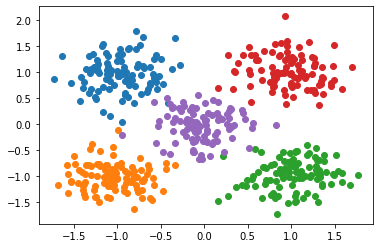

In [39]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.3)
 
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
 
y_cat = to_categorical(y, 5)
print(y_cat)

In [40]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='softmax'))
model.compile(Adam(learning_rate=0.1), 'categorical_crossentropy', metrics=['accuracy'])

#one hot encode output
history = model.fit(X, y_cat, verbose=1, batch_size = 25, epochs=20)

Epoch 1/20
20/20 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.7180
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.9700
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9820
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.9820
Epoch 5/20
20/20 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.9840
Epoch 6/20
20/20 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9840
Epoch 7/20
20/20 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9860
Epoch 8/20
20/20 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9860
Epoch 9/20
20/20 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9860
Epoch 10/20
20/20 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9880
Epoch 11/20
20/20 [

In [41]:

def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    #pred_func = model.predict_classes(grid)

    predict_x=model.predict(grid) 
    pred_func=np.argmax(predict_x, axis=1)

    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Prediction is:  [2]


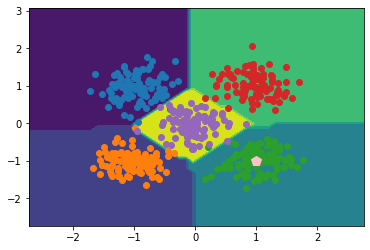

In [42]:

plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

x = 1
y = -1
 
point = np.array([[x, y]])

predict_x=model.predict(point) 
prediction=np.argmax(predict_x, axis=1)

plt.plot([x], [y], marker='p', markersize=10, color="pink")
print("Prediction is: ", prediction)